In [1]:
import pandas as pd
import scipy.stats as stats

df = pd.read_excel("http://taanila.fi/titanic.xlsx")
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [6]:
pd.crosstab(df["sex"], df["survived"])

survived,0,1
sex,,
female,127,339
male,682,161


In [5]:
stats.chi2_contingency(pd.crosstab(df["sex"], df["survived"]))

(363.6179084388249,
 4.589924936952945e-81,
 1,
 array([[288.00152788, 177.99847212],
        [520.99847212, 322.00152788]]))

Sukupuolen ja henkiinjäämisen riippuvuus on tilastollisesti merkitsevä.


In [16]:
#halutaan selvittää, onko iän ja hengissäselviämisen välillä riippuvuus; koska ikiä on paljon, ne niputetaan ikäryhmiksi
df["agegroup"]=pd.cut(df["age"], bins=[0,10,20,30,40,50,60,70,80])
df.head()                                       

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,agegroup
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO","(20, 30]"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON","(0, 10]"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON","(0, 10]"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON","(20, 30]"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON","(20, 30]"


In [17]:
pd.crosstab(df["agegroup"], df["survived"])

survived,0,1
agegroup,,
"(0, 10]",36,50
"(10, 20]",98,64
"(20, 30]",227,134
"(30, 40]",121,89
"(40, 50]",80,52
"(50, 60]",32,30
"(60, 70]",21,6
"(70, 80]",4,2


In [18]:
stats.chi2_contingency(pd.crosstab(df["agegroup"], df["survived"]))

(18.638580542588446,
 0.009398171529569288,
 7,
 array([[ 50.89292543,  35.10707457],
        [ 95.86806883,  66.13193117],
        [213.63193117, 147.36806883],
        [124.27342256,  85.72657744],
        [ 78.11472275,  53.88527725],
        [ 36.69024857,  25.30975143],
        [ 15.97801147,  11.02198853],
        [  3.55066922,   2.44933078]]))

Ikäryhmän ja henkiinjäämisen riippuvuus on tilastollisesti merkitsevä.

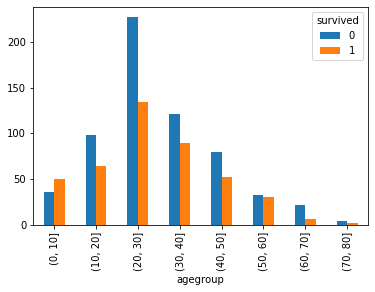

In [26]:
df1 = pd.crosstab(df["agegroup"], df["survived"])
df1.plot.bar()

In [22]:
df.to_pickle("titanic.pkl") #tallennetaan dataframe ja tarkistetaan tallennetun df:n toimivuus

In [23]:
df_uusi = pd.read_pickle('titanic.pkl')

In [24]:
df_uusi.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,agegroup
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO","(20, 30]"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON","(0, 10]"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON","(0, 10]"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON","(20, 30]"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON","(20, 30]"
